# Data Cleaning


In [3]:
#Import Libraries
import pandas as pd 
import os 
import csv 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
# 1. Create a DataFrame for the Emission data
emissions_data_df=pd.read_csv("https://dataanalyticsproject.s3.us-east-2.amazonaws.com/Merged_L5000.csv",index_col=[0])
emissions_data_df

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Emission,Population
0,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),1990,178.4682,12412.308
1,2,Afghanistan,5058,Enteric Fermentation,724413,Emissions (CO2eq) from CH4 (AR5),1990,4997.1108,12412.308
2,2,Afghanistan,5058,Enteric Fermentation,723113,Emissions (CO2eq) (AR5),1990,4997.1108,12412.308
3,2,Afghanistan,5059,Manure Management,7225,Emissions (CH4),1990,8.5165,12412.308
4,2,Afghanistan,5059,Manure Management,7230,Emissions (N2O),1990,0.3046,12412.308
...,...,...,...,...,...,...,...,...,...
728356,181,Zimbabwe,6516,Land Use change,7230,Emissions (N2O),2019,0.0000,14645.468
728357,181,Zimbabwe,6516,Land Use change,7273,Emissions (CO2),2019,10662.4408,14645.468
728358,181,Zimbabwe,6516,Land Use change,724413,Emissions (CO2eq) from CH4 (AR5),2019,0.0000,14645.468
728359,181,Zimbabwe,6516,Land Use change,724313,Emissions (CO2eq) from N2O (AR5),2019,0.0000,14645.468


In [6]:
# 2. Check the datatypes of your columns. 
emissions_data_df.dtypes

Area_Code         int64
Area             object
Item_Code         int64
Item             object
Element_Code      int64
Element          object
Year              int64
Emission        float64
Population      float64
dtype: object

In [7]:
#display the columns
emissions_data_df.columns

Index(['Area_Code', 'Area', 'Item_Code', 'Item', 'Element_Code', 'Element',
       'Year', 'Emission', 'Population'],
      dtype='object')

In [8]:
emissions_N2O_df = emissions_data_df[emissions_data_df['Item_Code'].isin([5059, 5061, 5062, 5063, 5064, 5064, 5066, 6795, 6994, 67291]) & 
                                        (emissions_data_df['Element_Code'] == 7230) &
                                        (emissions_data_df['Year'] > 2010 )&(emissions_data_df['Emission']>5) &
                                            (emissions_data_df['Population'] > 5000) ]


emissions_N2O_df

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Emission,Population
506864,2,Afghanistan,5063,Manure left on Pasture,7230,Emissions (N2O),2011,10.7180,30117.413
507096,4,Algeria,5063,Manure left on Pasture,7230,Emissions (N2O),2011,12.8453,36661.445
507335,7,Angola,5063,Manure left on Pasture,7230,Emissions (N2O),2011,8.6924,24220.661
507359,7,Angola,6795,Savanna fires,7230,Emissions (N2O),2011,48.0992,24220.661
507610,9,Argentina,5061,Synthetic Fertilizers,7230,Emissions (N2O),2011,17.8479,41320.500
...,...,...,...,...,...,...,...,...,...
728039,249,Yemen,5063,Manure left on Pasture,7230,Emissions (N2O),2019,9.1795,29161.922
728152,251,Zambia,5063,Manure left on Pasture,7230,Emissions (N2O),2019,7.1158,17861.030
728168,251,Zambia,67291,Drained organic soils (N2O),7230,Emissions (N2O),2019,9.1346,17861.030
728176,251,Zambia,6795,Savanna fires,7230,Emissions (N2O),2019,25.2249,17861.030


In [9]:
emissions_N2O_top_values = emissions_N2O_df.groupby(["Area_Code", "Item_Code", "Year"]).sum()["Emission"]
emissions_N2O_top_values

Area_Code  Item_Code  Year
2          5063       2011    10.7180
                      2012    10.5613
                      2013    10.3438
                      2014    10.4546
                      2015    10.2745
                               ...   
351        6994       2015    19.8222
                      2016    19.9259
                      2017    20.6055
                      2018    19.4482
                      2019    19.3872
Name: Emission, Length: 1970, dtype: float64

In [10]:
emissions_N2O_top_values = emissions_N2O_top_values.reset_index()
emissions_N2O_top_values

,Area_Code,Item_Code,Year,Emission
0,2,5063,2011,10.7180
1,2,5063,2012,10.5613
2,2,5063,2013,10.3438
3,2,5063,2014,10.4546
4,2,5063,2015,10.2745
...,...,...,...,...
1965,351,6994,2015,19.8222
1966,351,6994,2016,19.9259
1967,351,6994,2017,20.6055
1968,351,6994,2018,19.4482


In [11]:
emissions_N2O_top_values = emissions_N2O_top_values.sort_values(["Year","Emission"], ascending=False)
emissions_N2O_top_values.head(25)

,Area_Code,Item_Code,Year,Emission
1931,351,5061,2019,614.6788
399,41,5061,2019,611.2782
718,100,5061,2019,356.1963
199,21,5063,2019,343.4579
1653,231,5061,2019,243.7683
736,100,5063,2019,223.5402
1949,351,5063,2019,208.5655
417,41,5063,2019,207.5518
1671,231,5063,2019,131.2334
1958,351,5064,2019,125.3755


## Linear Regression - N2O Emission 

### Analysis of Top countries and corresponding most impacting items

In [12]:
#Synthetic Fertilizers Emission of China
emissions_N2O_top1_g1 =  emissions_N2O_top_values[((emissions_N2O_top_values["Item_Code"] == 5061) & 
                        (emissions_N2O_top_values["Area_Code"] == 351))]

emissions_N2O_top1_g1

,Area_Code,Item_Code,Year,Emission
1931,351,5061,2019,614.6788
1930,351,5061,2018,589.3793
1929,351,5061,2017,618.5608
1928,351,5061,2016,636.0964
1927,351,5061,2015,644.5354
1926,351,5061,2014,648.4884
1925,351,5061,2013,644.7093
1924,351,5061,2012,641.3496
1923,351,5061,2011,630.7979


Synthetic Fertilizers Emission of China


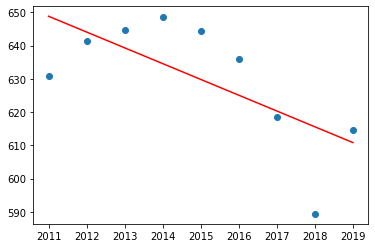

In [15]:
#Linear regression
print("Synthetic Fertilizers Emission of China")
X = emissions_N2O_top1_g1.Year
X = emissions_N2O_top1_g1.Year.values.reshape(-1, 1)
y = emissions_N2O_top1_g1.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [16]:
#Manure Left on Pasture Emission of China
emissions_N2O_top1_g2 =  emissions_N2O_top_values[((emissions_N2O_top_values["Item_Code"] == 5063) & 
                        (emissions_N2O_top_values["Area_Code"] == 351))]

emissions_N2O_top1_g2

,Area_Code,Item_Code,Year,Emission
1949,351,5063,2019,208.5655
1948,351,5063,2018,206.2425
1947,351,5063,2017,204.1435
1946,351,5063,2016,209.9701
1945,351,5063,2015,204.8032
1944,351,5063,2014,199.4779
1943,351,5063,2013,201.0714
1942,351,5063,2012,202.7127
1941,351,5063,2011,203.8508


Manure Left on Pasture Emission of China


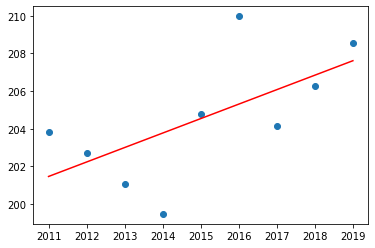

In [17]:
#Linear regression
print("Manure Left on Pasture Emission of China")
X = emissions_N2O_top1_g2.Year
X = emissions_N2O_top1_g2.Year.values.reshape(-1, 1)
y = emissions_N2O_top1_g2.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [18]:
##Synthetic Fertilizers Emission of Brazil
emissions_N2O_top2_g1 =  emissions_N2O_top_values[((emissions_N2O_top_values["Item_Code"] == 5061) & 
                        (emissions_N2O_top_values["Area_Code"] == 21))]

emissions_N2O_top2_g1

,Area_Code,Item_Code,Year,Emission
181,21,5061,2019,101.6444
180,21,5061,2018,106.6007
179,21,5061,2017,107.7031
178,21,5061,2016,90.6294
177,21,5061,2015,72.9211
176,21,5061,2014,94.3164
175,21,5061,2013,84.6901
174,21,5061,2012,71.9604
173,21,5061,2011,79.5996


Synthetic Fertilizers Emission of Brazil


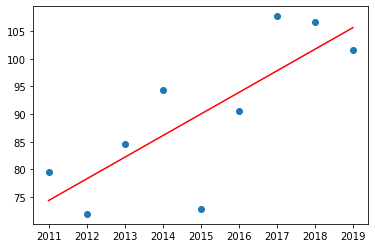

In [19]:
#Linear regression
print("Synthetic Fertilizers Emission of Brazil")
X = emissions_N2O_top2_g1.Year
X = emissions_N2O_top2_g1.Year.values.reshape(-1, 1)
y = emissions_N2O_top2_g1.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

Manure Left on Pasture Emission of Brazil


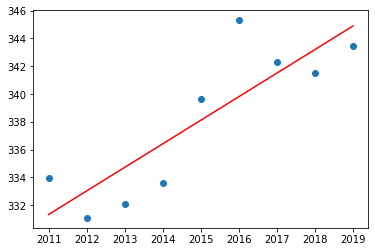

In [20]:
#Manure Left on Pasture Emission of Brazil
emissions_N2O_top2_g2 =  emissions_N2O_top_values[((emissions_N2O_top_values["Item_Code"] == 5063) & 
                        (emissions_N2O_top_values["Area_Code"] == 21))]

#Linear regression
print("Manure Left on Pasture Emission of Brazil")
X = emissions_N2O_top2_g2.Year
X = emissions_N2O_top2_g2.Year.values.reshape(-1, 1)
y = emissions_N2O_top2_g2.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

Manure Left on Pasture Emission of India


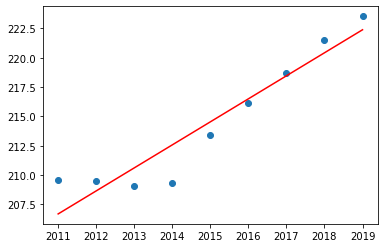

In [24]:
#Manure Left on Pasture Emission of India
emissions_N2O_top3_g2 =  emissions_N2O_top_values[((emissions_N2O_top_values["Item_Code"] == 5063) & 
                        (emissions_N2O_top_values["Area_Code"] == 100))]

#Linear regression
print("Manure Left on Pasture Emission of India")
X = emissions_N2O_top3_g2.Year
X = emissions_N2O_top3_g2.Year.values.reshape(-1, 1)
y = emissions_N2O_top3_g2.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

On-Farm Energy Use Emission of USA


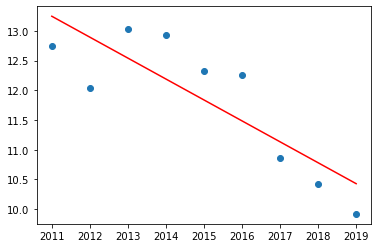

In [23]:
# On-Farm Energy Use Emission of USA
emissions_N2O_top3_g3 =  emissions_N2O_top_values[((emissions_N2O_top_values["Item_Code"] == 6994) & 
                        (emissions_N2O_top_values["Area_Code"] == 231))]

#Linear regression
print("On-Farm Energy Use Emission of USA")
X = emissions_N2O_top3_g3.Year
X = emissions_N2O_top3_g3.Year.values.reshape(-1, 1)
y = emissions_N2O_top3_g3.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()